## Lập trình xử lý dữ liệu - Nhóm 7: Đánh đâu lỗ đó
### Notebook Xử lý dữ liệu cơ bản
---

### Lọc dữ liệu lần 2

In [1]:
import pandas as pd
import numpy as np
import json 
from dateutil.parser import isoparser

posts_df = pd.read_csv("cleaned_posts.csv")
replies_df = pd.read_csv('cleaned_replies.csv')


posts_df.head(3)

,postID,originalContent,date,link,sentiment,totalLikes,totalReplies,replyToPostID,taggedSymbols,username,userid,totalImages,totalSymbols
0,29104030,Vkl luôn,2024-11-06T21:39:23.267+07:00,NaN,0,1,0,NaN,"[{'symb': '^DJI', 'price': 43496.43}]",Hoàng,5ededf24-12f7-41d9-b390-08ff631fc275,0,1
1,29104026,Đ.ịt cụ thằng Khải Trần hô VNI sập về 900 lần ...,2024-11-06T21:39:05.22+07:00,NaN,0,0,0,NaN,[],Datbg10,73778567-ec61-43eb-b3a0-b4a651b8bd3f,0,0
2,29104024,Tăng 1 phát bằng vn làm hai mấy năm :)),2024-11-06T21:39:04.077+07:00,NaN,0,12,2,NaN,"[{'symb': '^DJI', 'price': 43506.86}]",Trung Tuyến,5d597f38-3b24-4f40-952c-2b3f9be8e7d5,0,1


In [2]:
# Convert data type from 'object' to a Python string
posts_df['taggedSymbols'] = posts_df['taggedSymbols'].astype("string")
posts_df['postID'] = posts_df['postID'].astype('string')
posts_df['originalContent'] = posts_df['originalContent'].astype("string")
posts_df['link'] = posts_df['link'].astype("string")

posts_df['sentiment'] = posts_df['sentiment'].astype('string')
posts_df['sentiment'] = posts_df['sentiment'].map({'1' : 'positive', '0' : 'neutral', '-1' : 'negative'})

posts_df['totalLikes'] = pd.to_numeric(posts_df['totalLikes'], errors='coerce').astype('Int64')
posts_df['totalReplies'] = pd.to_numeric(posts_df['totalReplies'], errors='coerce').astype('Int64')

posts_df['date'] = posts_df['date'].astype("string")
posts_df['date'] = posts_df['date'].apply(lambda x: isoparser().isoparse(x) if pd.notnull(x) else pd.NaT)


posts_df['totalImages'] = pd.to_numeric(posts_df['totalImages'], errors='coerce').astype('Int64')
posts_df['totalSymbols'] = pd.to_numeric(posts_df['totalSymbols'], errors = 'coerce').astype('Int64')

posts_df['replyToPostID'] = posts_df['replyToPostID'].astype("string")
posts_df['username'] = posts_df['username'].astype("string")
posts_df['userid'] = posts_df['userid'].astype('string')

 


# Check the data type
print(posts_df.dtypes)


postID                                    string[python]
originalContent                           string[python]
date               datetime64[ns, tzoffset(None, 25200)]
link                                      string[python]
sentiment                                         object
totalLikes                                         Int64
totalReplies                                       Int64
replyToPostID                             string[python]
taggedSymbols                             string[python]
username                                  string[python]
userid                                    string[python]
totalImages                                        Int64
totalSymbols                                       Int64
dtype: object


### Thêm vào hai cột mới symbol và price từ cột taggedSymbols

In [3]:
import json
def extract_price(x):
    try: 
        # Ensure that single quotes in the 'taggedSymbols' column are replaced with double quotes for JSON parsing
        data = json.loads(x.replace("'", '"')) 
        if isinstance(data, list) and len(data) > 0: # Check if data is a list of dictionaries
            return data[0].get('price')
        elif isinstance(data, dict): # Check if data is a dictionary
            return data.get('price')
    except json.JSONDecodeError:
        return None

posts_df['price'] = posts_df['taggedSymbols'].apply(extract_price)

def extract_symbol(x):
    try:
        data = json.loads(x.replace("'", '"'))
        if isinstance(data, list) and len(data) > 0:
            return data[0].get('symb')
        elif isinstance(data, dict):
            return data.get('symb')
    except json.JSONDecodeError:
        return None
posts_df['symbol'] = posts_df['taggedSymbols'].apply(extract_symbol)     
posts_df.head(5)   

,postID,originalContent,date,link,sentiment,totalLikes,totalReplies,replyToPostID,taggedSymbols,username,userid,totalImages,totalSymbols,price,symbol
0,29104030,Vkl luôn,2024-11-06 21:39:23.267000+07:00,<NA>,neutral,1,0,<NA>,"[{'symb': '^DJI', 'price': 43496.43}]",Hoàng,5ededf24-12f7-41d9-b390-08ff631fc275,0,1,43496.43,^DJI
1,29104026,Đ.ịt cụ thằng Khải Trần hô VNI sập về 900 lần ...,2024-11-06 21:39:05.220000+07:00,<NA>,neutral,0,0,<NA>,[],Datbg10,73778567-ec61-43eb-b3a0-b4a651b8bd3f,0,0,NaN,None
2,29104024,Tăng 1 phát bằng vn làm hai mấy năm :)),2024-11-06 21:39:04.077000+07:00,<NA>,neutral,12,2,<NA>,"[{'symb': '^DJI', 'price': 43506.86}]",Trung Tuyến,5d597f38-3b24-4f40-952c-2b3f9be8e7d5,0,1,43506.86,^DJI
3,29104021,Má đáng full tiền...đau,2024-11-06 21:38:52.277000+07:00,<NA>,neutral,0,1,<NA>,"[{'symb': 'VNINDEX', 'price': 1261.28}]",Duc Nguyen,225659c6-cf18-4e93-aa39-a294bae5b784,1,1,1261.28,VNINDEX
4,29104019,Gap khủng long,2024-11-06 21:38:49.990000+07:00,<NA>,neutral,2,0,<NA>,"[{'symb': '^DJI', 'price': 43499.54}]",BINH NHI,da8ebfa2-9cd5-4dbf-84cd-9567f694f681,0,1,43499.54,^DJI


In [4]:
# Bỏ cột taggedSymbols
posts_df.drop('taggedSymbols', axis = 1, inplace = True)
posts_df.head(3)

,postID,originalContent,date,link,sentiment,totalLikes,totalReplies,replyToPostID,username,userid,totalImages,totalSymbols,price,symbol
0,29104030,Vkl luôn,2024-11-06 21:39:23.267000+07:00,<NA>,neutral,1,0,<NA>,Hoàng,5ededf24-12f7-41d9-b390-08ff631fc275,0,1,43496.43,^DJI
1,29104026,Đ.ịt cụ thằng Khải Trần hô VNI sập về 900 lần ...,2024-11-06 21:39:05.220000+07:00,<NA>,neutral,0,0,<NA>,Datbg10,73778567-ec61-43eb-b3a0-b4a651b8bd3f,0,0,NaN,None
2,29104024,Tăng 1 phát bằng vn làm hai mấy năm :)),2024-11-06 21:39:04.077000+07:00,<NA>,neutral,12,2,<NA>,Trung Tuyến,5d597f38-3b24-4f40-952c-2b3f9be8e7d5,0,1,43506.86,^DJI


In [5]:
# Bỏ một số ký tự thừa trong cột symbol
posts_df['symbol'] = posts_df['symbol'].str.replace('^', '', regex=False)
posts_df.head(10)

,postID,originalContent,date,link,sentiment,totalLikes,totalReplies,replyToPostID,username,userid,totalImages,totalSymbols,price,symbol
0,29104030,Vkl luôn,2024-11-06 21:39:23.267000+07:00,<NA>,neutral,1,0,<NA>,Hoàng,5ededf24-12f7-41d9-b390-08ff631fc275,0,1,43496.43,DJI
1,29104026,Đ.ịt cụ thằng Khải Trần hô VNI sập về 900 lần ...,2024-11-06 21:39:05.220000+07:00,<NA>,neutral,0,0,<NA>,Datbg10,73778567-ec61-43eb-b3a0-b4a651b8bd3f,0,0,NaN,None
2,29104024,Tăng 1 phát bằng vn làm hai mấy năm :)),2024-11-06 21:39:04.077000+07:00,<NA>,neutral,12,2,<NA>,Trung Tuyến,5d597f38-3b24-4f40-952c-2b3f9be8e7d5,0,1,43506.86,DJI
3,29104021,Má đáng full tiền...đau,2024-11-06 21:38:52.277000+07:00,<NA>,neutral,0,1,<NA>,Duc Nguyen,225659c6-cf18-4e93-aa39-a294bae5b784,1,1,1261.28,VNINDEX
4,29104019,Gap khủng long,2024-11-06 21:38:49.990000+07:00,<NA>,neutral,2,0,<NA>,BINH NHI,da8ebfa2-9cd5-4dbf-84cd-9567f694f681,0,1,43499.54,DJI
5,29104018,Lãi lollll cổ phiếu Tesla kìa ! Vnindex tăng 1...,2024-11-06 21:38:48.120000+07:00,<NA>,neutral,1,2,<NA>,Tư Bản Mẽo,eef9912f-f5eb-4f32-8cc7-71a214b7d02a,0,2,43499.54,DJI
6,29104017,Vll bắn rocket chúc mừng tổng thống à 😀😀,2024-11-06 21:38:47.277000+07:00,<NA>,neutral,1,0,<NA>,Chứng Khoán Ratataa,6098ffbe-1d85-488a-8a0e-326c9e9cfc0b,0,1,43513.29,DJI
7,29104016,https://www.youtube.com/live/rfLkHPX-CJo?si=5x...,2024-11-06 21:38:45.743000+07:00,https://www.youtube.com/live/rfLkHPX-CJo,neutral,0,0,<NA>,luotsong,2cb455b0-1cf1-4bbf-8f33-4bcca4340424,0,10,48.05,BID
8,29104013,Xứ người ta. Người thật việc thật. =)))). Xứ t...,2024-11-06 21:38:43.593000+07:00,<NA>,neutral,5,1,<NA>,Tâm Tịnh,875af00e-9ef4-46a6-a942-0da88edba874,0,1,43513.29,DJI
9,29104009,1 phiên chất vấn brk rất hay ae,2024-11-06 21:38:37.387000+07:00,<NA>,neutral,2,8,<NA>,THÍCH CHƠI XÍCH ĐU,5a1365a4-46fc-41d7-b021-45f7d02d639f,3,1,29.45,HCM


#### Do khi cào dữ liệu API coi mỗi reply là một post, do đó cột replyToPostId hiện tại của dataframe posts_df đều có giá trị là NA. Ta sẽ phải lấy dữ liệu từ cột postID và replyToPostID từ dataframe replies_df 

In [6]:
replies_df.head(3)

,postID,originalContent,date,link,sentiment,isTop,isExpertIdea,totalLikes,totalReplies,replyToPostID,referToPostID,taggedSymbols,username,userid,totalImages,totalSymbols
0,29100636,Bác có thể đưa ra kịch bản rằng : Họ sai!\nSố ...,2024-11-06T16:37:32.923+07:00,NaN,0,False,False,1,0,29099549,NaN,[],NDC,028e4d25-5631-4f3f-8f72-235eabaef9ba,0,0
1,29100614,"Sao số liệu tự doanh mỗi nơi mỗi khác nhỉ, nay...",2024-11-06T16:35:32.107+07:00,NaN,0,False,False,1,0,29099549,NaN,[],Alex,d0a457ea-b787-4263-bdd1-0e8d0bfc63d9,0,0
2,29100602,hiện basic cạn cả cung cả cầu. Nn thoát basic ...,2024-11-06T16:34:42.663+07:00,NaN,0,False,False,0,0,29099549,NaN,[],Upgrading to Fo,3cc4dffe-ac35-4ac8-95d8-6eb677353d5d,0,0


In [7]:
#Create the post_reply_dict from replies_df
post_reply_dict = dict(zip(replies_df['postID'], replies_df['replyToPostID']))

# set 'replyToPostID' in posts_df to the value from the dictionary if it exists
posts_df['replyToPostID'] = posts_df['postID'].map(post_reply_dict)

#Increment 'totalReplies' for posts that are being replied to
posts_df.loc[posts_df['replyToPostID'].notna(), 'totalReplies'] += 1

        
posts_df.head(5)

,postID,originalContent,date,link,sentiment,totalLikes,totalReplies,replyToPostID,username,userid,totalImages,totalSymbols,price,symbol
0,29104030,Vkl luôn,2024-11-06 21:39:23.267000+07:00,<NA>,neutral,1,0,NaN,Hoàng,5ededf24-12f7-41d9-b390-08ff631fc275,0,1,43496.43,DJI
1,29104026,Đ.ịt cụ thằng Khải Trần hô VNI sập về 900 lần ...,2024-11-06 21:39:05.220000+07:00,<NA>,neutral,0,0,NaN,Datbg10,73778567-ec61-43eb-b3a0-b4a651b8bd3f,0,0,NaN,None
2,29104024,Tăng 1 phát bằng vn làm hai mấy năm :)),2024-11-06 21:39:04.077000+07:00,<NA>,neutral,12,2,NaN,Trung Tuyến,5d597f38-3b24-4f40-952c-2b3f9be8e7d5,0,1,43506.86,DJI
3,29104021,Má đáng full tiền...đau,2024-11-06 21:38:52.277000+07:00,<NA>,neutral,0,1,NaN,Duc Nguyen,225659c6-cf18-4e93-aa39-a294bae5b784,1,1,1261.28,VNINDEX
4,29104019,Gap khủng long,2024-11-06 21:38:49.990000+07:00,<NA>,neutral,2,0,NaN,BINH NHI,da8ebfa2-9cd5-4dbf-84cd-9567f694f681,0,1,43499.54,DJI


In [8]:
print(replies_df['totalReplies'].unique())
print(replies_df['taggedSymbols'].unique())
print(replies_df['isTop'].unique())
print(replies_df['isExpertIdea'].unique())
print(replies_df['sentiment'].unique())
print(replies_df['totalSymbols'].unique())
print(replies_df['referToPostID'].unique())

print(posts_df['replyToPostID'].unique())


[0]
['[]']
[False]
[False]
[0]
[0]
[nan]
[nan]


#### Dễ thấy các cột trên đều chỉ có một giá rỗng(0, False, []), do đó ta thực hiện loại bỏ các cột này

In [9]:
replies_df.drop(['totalReplies', 'taggedSymbols', 'isTop', 'isExpertIdea', 'sentiment', 'totalSymbols', 'referToPostID'], axis = 1, inplace = True)
posts_df.drop(['replyToPostID'], axis = 1, inplace = True)
replies_df.head(5)


,postID,originalContent,date,link,totalLikes,replyToPostID,username,userid,totalImages
0,29100636,Bác có thể đưa ra kịch bản rằng : Họ sai!\nSố ...,2024-11-06T16:37:32.923+07:00,NaN,1,29099549,NDC,028e4d25-5631-4f3f-8f72-235eabaef9ba,0
1,29100614,"Sao số liệu tự doanh mỗi nơi mỗi khác nhỉ, nay...",2024-11-06T16:35:32.107+07:00,NaN,1,29099549,Alex,d0a457ea-b787-4263-bdd1-0e8d0bfc63d9,0
2,29100602,hiện basic cạn cả cung cả cầu. Nn thoát basic ...,2024-11-06T16:34:42.663+07:00,NaN,0,29099549,Upgrading to Fo,3cc4dffe-ac35-4ac8-95d8-6eb677353d5d,0
3,29100595,:)) bác lại chuẩn bài quá đó.,2024-11-06T16:34:04.07+07:00,NaN,0,29099549,NDC,028e4d25-5631-4f3f-8f72-235eabaef9ba,0
4,29100584,"rõ ràng phải có chữ NẾU, lỡ ko đc còn có cái m...",2024-11-06T16:33:33.9+07:00,NaN,0,29099549,Tùng Cận,2b323870-af46-471a-aee7-bd28a23990e2,0


In [10]:
replies_df['postID'] = replies_df['postID'].astype("string")
replies_df['originalContent'] = replies_df['originalContent'].astype("string")
replies_df['link'] = replies_df['link'].astype('string')
replies_df['username'] = replies_df['username'].astype('string')
replies_df['replyToPostID'] = replies_df['replyToPostID'].astype('string')
replies_df['userid'] = replies_df['userid'].astype('string')



replies_df['totalLikes'] = pd.to_numeric(replies_df['totalLikes'], errors = 'coerce').astype("int64")
replies_df['totalLikes'] = pd.to_numeric(replies_df['totalLikes'], errors = 'coerce').astype('int64')


replies_df['date'] = replies_df['date'].astype('string')
replies_df['date'] = replies_df['date'].apply(lambda x : isoparser().isoparse(x) if pd.notnull(x) else pd.NaT)

print(replies_df.dtypes)

postID                                    string[python]
originalContent                           string[python]
date               datetime64[ns, tzoffset(None, 25200)]
link                                      string[python]
totalLikes                                         int64
replyToPostID                             string[python]
username                                  string[python]
userid                                    string[python]
totalImages                                        int64
dtype: object


---
### Thực hiện các tính toán và thống kê cơ bản

#### Xếp hàng các công ty - thương hiệu được đề cập đến nhiều nhất

In [11]:
company_occurrences = posts_df['symbol'].value_counts()
company_occurrences.head(20)
posts_df


,postID,originalContent,date,link,sentiment,totalLikes,totalReplies,username,userid,totalImages,totalSymbols,price,symbol
0,29104030,Vkl luôn,2024-11-06 21:39:23.267000+07:00,<NA>,neutral,1,0,Hoàng,5ededf24-12f7-41d9-b390-08ff631fc275,0,1,43496.43,DJI
1,29104026,Đ.ịt cụ thằng Khải Trần hô VNI sập về 900 lần ...,2024-11-06 21:39:05.220000+07:00,<NA>,neutral,0,0,Datbg10,73778567-ec61-43eb-b3a0-b4a651b8bd3f,0,0,NaN,None
2,29104024,Tăng 1 phát bằng vn làm hai mấy năm :)),2024-11-06 21:39:04.077000+07:00,<NA>,neutral,12,2,Trung Tuyến,5d597f38-3b24-4f40-952c-2b3f9be8e7d5,0,1,43506.86,DJI
3,29104021,Má đáng full tiền...đau,2024-11-06 21:38:52.277000+07:00,<NA>,neutral,0,1,Duc Nguyen,225659c6-cf18-4e93-aa39-a294bae5b784,1,1,1261.28,VNINDEX
4,29104019,Gap khủng long,2024-11-06 21:38:49.990000+07:00,<NA>,neutral,2,0,BINH NHI,da8ebfa2-9cd5-4dbf-84cd-9567f694f681,0,1,43499.54,DJI
...,...,...,...,...,...,...,...,...,...,...,...,...,...
272974,28008015,**** nhau quá đáng vc,2024-09-06 09:54:04.067000+07:00,<NA>,neutral,2,0,NTH,eed1b1ff-a87b-43a8-acf3-60605631cd8e,0,1,34.00,GVR
272975,28008013,"CON NÀY NÓ CHẾT DẬP CHẾT DỤI QUÁ CƠ, HIC",2024-09-06 09:54:03.033000+07:00,<NA>,neutral,0,0,Xuân Phú,69659543-c04f-4f3d-9b7b-2543d3f4e4a7,0,1,22.75,DIG
272976,28008006,Múc ! Rũ để vượt đỉnh nào,2024-09-06 09:53:56.957000+07:00,<NA>,neutral,3,0,Hồ Đồng,8087c7d2-960f-4160-b0c0-4dc782d02a12,0,1,131.30,FPT
272977,28008001,"Đừng mong giá rẻ hơn mấy ní ạ , đỏ ko mua xanh...",2024-09-06 09:53:50.097000+07:00,<NA>,neutral,3,6,Diệt Chim Lợn Chó,f2133134-296f-4572-90fc-6cb4a81cf7d6,0,1,13.90,OIL


### Thống kê số lượng các bài đăng tích cực, tiêu cực và trung lập của mỗi thương hiệu

In [ ]:
stock_symbols_analysis = posts_df.groupby('symbol').agg(
    TotalPosts = ('sentiment', 'count'),
    NumberOFPositivePosts = ('sentiment', lambda x : (x == 'positive').sum()),
    NumberOFNegativePosts = ("sentiment", lambda x : (x == 'negative').sum()),
    NumberOfNeutralPosts = ('sentiment', lambda x : (x == 'neutral').sum()),
).reset_index()


    
stock_symbols_analysis['PositiveRatio'] = stock_symbols_analysis['NumberOFPositivePosts'] / stock_symbols_analysis['NumberOFNegativePosts']
stock_symbols_analysis['PositiveRatio'] = stock_symbols_analysis['PositiveRatio'].replace([np.inf, -np.inf, np.nan], 0)
stock_symbols_analysis = stock_symbols_analysis.round(2)

average_total_posts = round(stock_symbols_analysis['TotalPosts'].mean(), 2)
average_total_positive_posts = round(stock_symbols_analysis['NumberOFPositivePosts'].mean(), 2)
average_total_negative_posts = round(stock_symbols_analysis['NumberOFNegativePosts'].mean(), 2)
average_positive_ratio = round(stock_symbols_analysis['PositiveRatio'].mean(), 2)


# Print all the average values
print(f"Average Total Posts: {average_total_posts}")
print(f"Average Total Positive Posts: {average_total_positive_posts}")
print(f"Average Total Negative Posts: {average_total_negative_posts}")
print(f"Average Positive Ratio: {average_positive_ratio}")

stock_symbols_analysis.sort_values(['NumberOFPositivePosts', 'NumberOFNegativePosts', 'PositiveRatio'], ascending = [False, False ,False]).head(20)



Average Total Posts: 236.0
Average Total Positive Posts: 22.43
Average Total Negative Posts: 11.67
Average Positive Ratio: 0.88


,symbol,TotalPosts,NumberOFPositivePosts,NumberOFNegativePosts,NumberOfNeutralPosts,PositiveRatio
1066,VNINDEX,29199,1975,1874,25350,1.05
62,ACB,4335,1494,116,2725,12.88
342,DIG,6837,832,350,5655,2.38
344,DJI,5566,790,428,4348,1.85
507,HPG,5331,752,220,4359,3.42
382,DXG,5362,689,227,4446,3.04
288,CTG,3107,663,105,2339,6.31
1053,VN30,2591,640,163,1788,3.93
469,HCM,2768,539,88,2141,6.12
1035,VHM,6947,503,332,6112,1.52


In [ ]:
popular_brand_list = stock_symbols_analysis.loc[stock_symbols_analysis['TotalPosts'] > 3000]['symbol']
popular_brand_list = popular_brand_list.tolist()
print(popular_brand_list)

['$BTC', 'ACB', 'BSR', 'CEO', 'CTG', 'DIG', 'DJI', 'DXG', 'HPG', 'NVL', 'SHB', 'TCH', 'TPB', 'VHM', 'VIX', 'VN30F1M', 'VND', 'VNINDEX']


In [14]:
VNINDEX_df = posts_df.loc[posts_df['symbol'] == 'VNINDEX']
VNINDEX_df = VNINDEX_df.sort_values(by = 'date', ascending = True)
VNINDEX_df['date'] = VNINDEX_df['date'].dt.date
VNINDEX_df


,postID,originalContent,date,link,sentiment,totalLikes,totalReplies,username,userid,totalImages,totalSymbols,price,symbol
272964,28008058,Tiền đi đâu hết rồi. Thanh khoản yếu thế này c...,2024-09-06,<NA>,negative,0,0,Hành Trình Về Bờ 🧑🏻‍🎤,8afad925-61c1-4ee3-8aa0-1890ad019fbe,0,1,1268.58,VNINDEX
272962,28008064,"Báo cáo ""Tình hình kinh tế – xã hội tháng Tá...",2024-09-06,<NA>,positive,0,0,Đức Tân,95a7cfc9-9a73-4a88-a19b-11656766ab94,0,1,1268.54,VNINDEX
272957,28008070,"Ae cầm chuôi chủ động oánh, thời điểm ít đu bá...",2024-09-06,<NA>,neutral,0,0,Dự Báo Thời Lượng,b8fb055e-4a12-4d0a-844d-d8cbfd7b5221,0,1,1268.61,VNINDEX
272935,28008179,"Sập thì sập cm.nđ, sốt cả ruột.",2024-09-06,<NA>,negative,1,0,10B Nguyễn Gia Thiều,6489726b-7bb0-4149-a722-964132b2aca2,0,1,1268.53,VNINDEX
272933,28008185,Vô đi các con...sắp lên 1300 rồi đó..lìu xìu v...,2024-09-06,<NA>,negative,0,0,Helen Lan Anh,00cafff2-e845-4022-bafe-5113a8e7924d,0,1,1268.46,VNINDEX
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,29103585,Các Em sắp được ăn món 🧅 từ nhóm 5 con 🐕‍🦺 Cứ...,2024-11-06,<NA>,positive,0,5,Revenge555,dd87bea9-6b4f-43f7-b788-d91cdf59cd02,1,1,1261.28,VNINDEX
134,29103620,Ủa sao ko thấy hô 1500 1800 thẳng tiến roài,2024-11-06,<NA>,neutral,0,0,Dat Luu,425d3095-1358-45be-b097-49c59a89a4f2,0,1,1261.28,VNINDEX
85,29103817,"Anh em mãn nhãn chưa, tăng gần 1200đ mở bát bằ...",2024-11-06,<NA>,neutral,0,0,Săn Siêu Cổ,90b8b21a-c420-4a61-923c-20a1bae99b4d,0,1,1261.28,VNINDEX
41,29103926,Mai VNi tăng hở gap lên 1300 nhỉ. Ngủ sớm để c...,2024-11-06,<NA>,neutral,0,0,F0 Người Đầu Tư,cecd3dc3-6023-4177-b139-a4f10a112fde,0,1,1261.28,VNINDEX


In [141]:
VNINDEX_analyse = VNINDEX_df.groupby(['date']).agg(
    NumberOfPosts=('postID', 'count'),
    NumberOfNegativePosts=('sentiment', lambda x: (x == 'negative').sum()),
    NumberOfPositivePosts=('sentiment', lambda x: (x == 'positive').sum()),
    price=('price', 'mean')  # Aggregation function for 'price'
).reset_index()

# Display the result
VNINDEX_analyse.head(20)


,date,NumberOfPosts,NumberOfNegativePosts,NumberOfPositivePosts,price
0,2024-09-06,433,24,26,1268.119630
1,2024-09-07,37,4,3,1273.960000
2,2024-09-08,32,4,4,1273.960000
3,2024-09-09,447,31,36,1267.670805
4,2024-09-10,729,41,38,1260.108724
5,2024-09-11,634,46,27,1250.531278
6,2024-09-12,474,39,32,1257.334684
7,2024-09-13,616,34,44,1251.649172
8,2024-09-14,28,2,3,1251.710000
9,2024-09-15,36,4,5,1251.710000


<Figure size 1200x800 with 0 Axes>

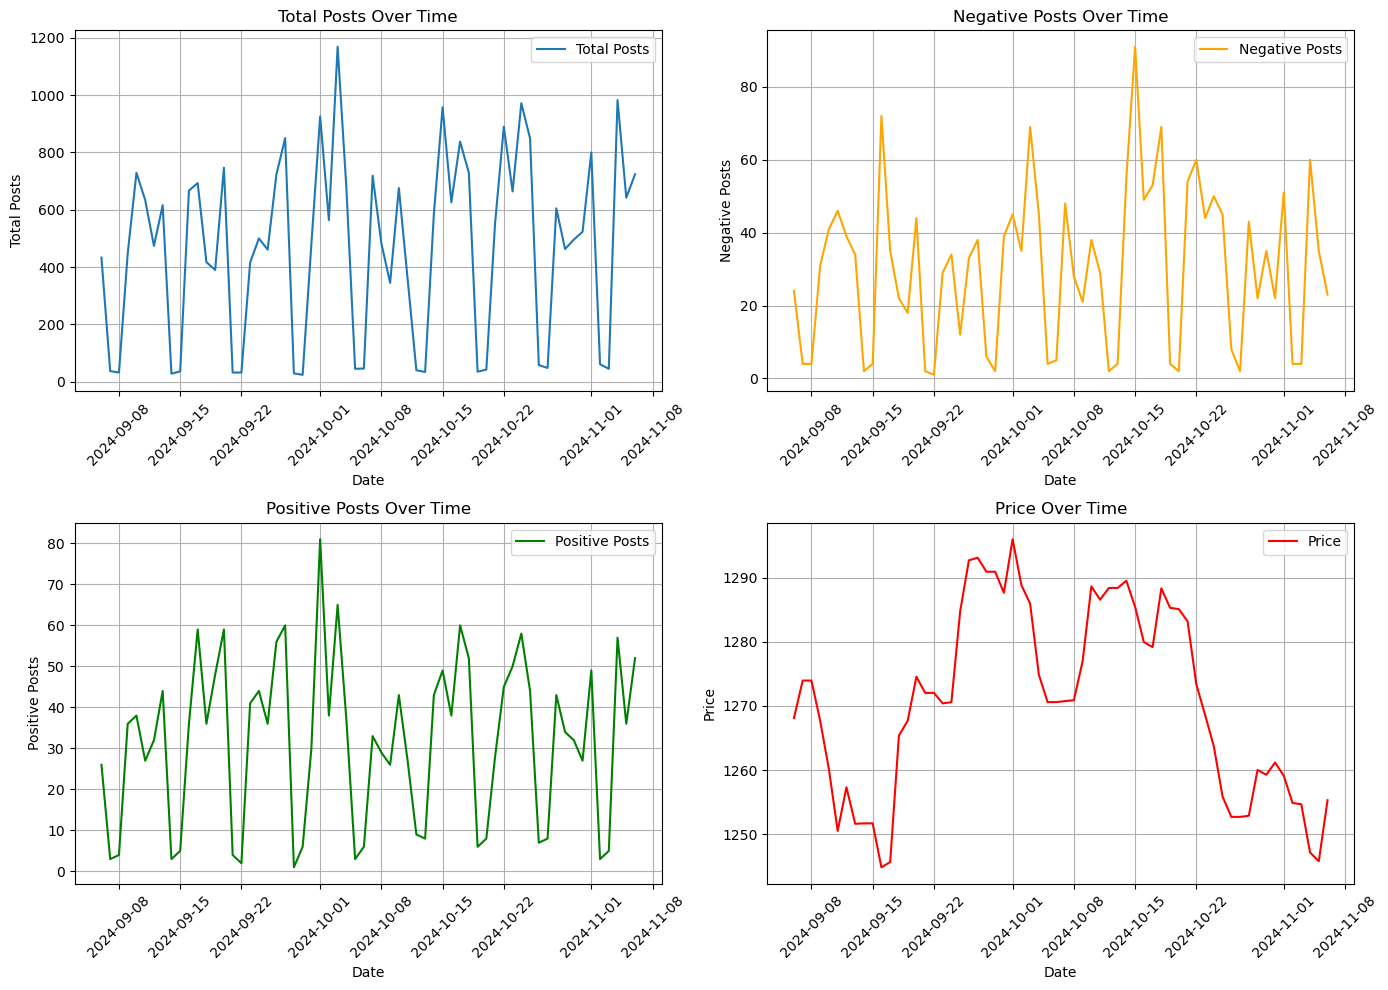

In [142]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 8))


# Set up a 2x2 grid for subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot each variable in a separate subplot using the raw data
axes[0, 0].plot(VNINDEX_analyse['date'], VNINDEX_analyse['NumberOfPosts'], label='Total Posts')
axes[0, 0].set_title("Total Posts Over Time")
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Total Posts')
axes[0, 0].legend()
axes[0, 0].grid(True)
axes[0, 0].tick_params(axis='x', rotation=45)

axes[0, 1].plot(VNINDEX_analyse['date'], VNINDEX_analyse['NumberOfNegativePosts'], label='Negative Posts', color='orange')
axes[0, 1].set_title("Negative Posts Over Time")
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Negative Posts')
axes[0, 1].legend()
axes[0, 1].grid(True)
axes[0, 1].tick_params(axis='x', rotation=45)

axes[1, 0].plot(VNINDEX_analyse['date'], VNINDEX_analyse['NumberOfPositivePosts'], label='Positive Posts', color='green')
axes[1, 0].set_title("Positive Posts Over Time")
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Positive Posts')
axes[1, 0].legend()
axes[1, 0].grid(True)
axes[1, 0].tick_params(axis='x', rotation=45)

axes[1, 1].plot(VNINDEX_analyse['date'], VNINDEX_analyse['price'], label='Price', color='red')
axes[1, 1].set_title("Price Over Time")
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Price')
axes[1, 1].legend()
axes[1, 1].grid(True)
axes[1, 1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

In [143]:
import seaborn as sns
# Calculate the average and standard deviation of the VNINDEX price
average_vnindex_price = VNINDEX_analyse['price'].mean()
standard_price_deviation = VNINDEX_analyse['price'].std()

# Calculate the correlation between different post categories and the price
correlation_positive_price = (VNINDEX_analyse['NumberOfPositivePosts'] / VNINDEX_analyse['NumberOfPosts']).corr(VNINDEX_analyse['price'])
correlation_negative_price = (VNINDEX_analyse['NumberOfNegativePosts'] / VNINDEX_analyse['NumberOfPosts']).corr(VNINDEX_analyse['price'])
correlation_posts_price = (VNINDEX_analyse['NumberOfPosts']).corr(VNINDEX_analyse['price'])

# Calculate percentage change for posts and price
VNINDEX_analyse['posts_pct_change'] = VNINDEX_analyse['NumberOfPosts'].pct_change() 
VNINDEX_analyse['price_pct_change'] = VNINDEX_analyse['price'].pct_change() * 100


# Calculate correlation between percentage change in posts and price
correlation_pct_change = VNINDEX_analyse['posts_pct_change'].corr(VNINDEX_analyse['price_pct_change'])

# Print the results with formatting
print(f"Average VNINDEX Price: {average_vnindex_price:.2f}")
print(f"Standard Deviation of Price: {standard_price_deviation:.2f}")
print(f"Correlation between Positive Posts and Price: {correlation_positive_price:.2f}")
print(f"Correlation between Negative Posts and Price: {correlation_negative_price:.2f}")
print(f"Correlation between the Number of Posts and Price: {correlation_posts_price:.2f}")
print(f"Correlation between Percentage Change of Posts and Price: {correlation_pct_change:.2f}")



Average VNINDEX Price: 1270.66
Standard Deviation of Price: 14.68
Correlation between Positive Posts and Price: 0.21
Correlation between Negative Posts and Price: 0.13
Correlation between the Number of Posts and Price: 0.00
Correlation between Percentage Change of Posts and Price: -0.20


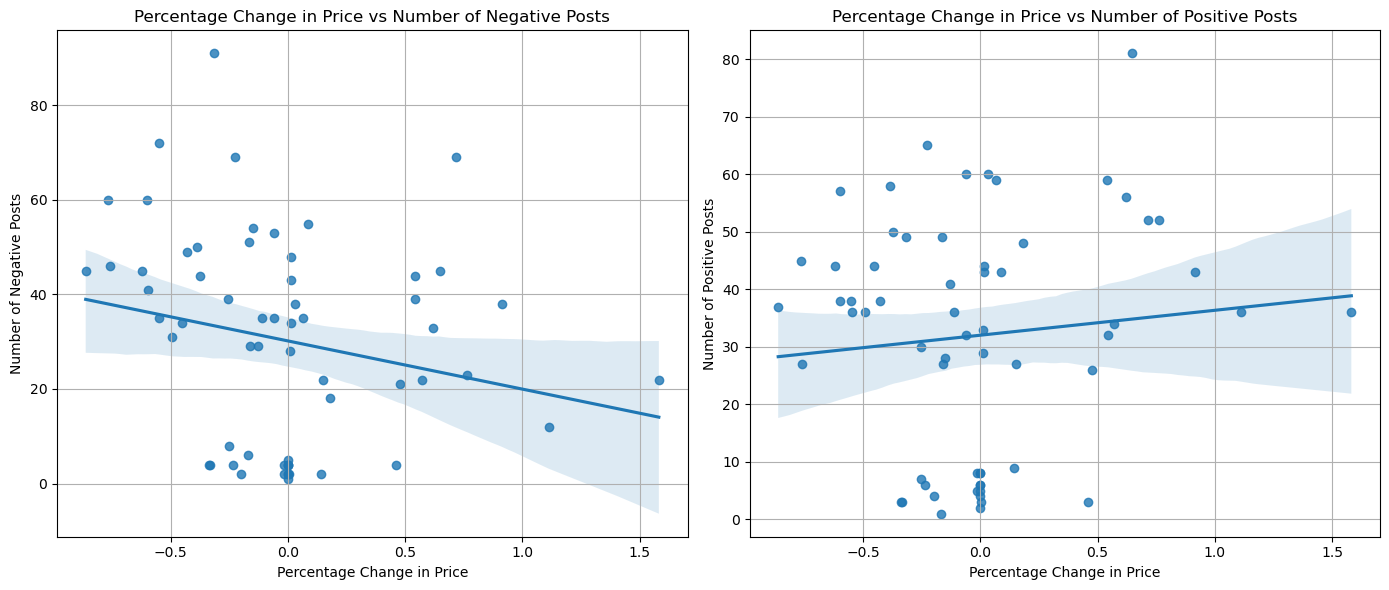

In [144]:
import seaborn as sns

import seaborn as sns

# Set up a 1x2 grid for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Number of Negative Posts
sns.regplot(x='price_pct_change', y='NumberOfNegativePosts', data=VNINDEX_analyse, ax=axes[0])
axes[0].set_title('Percentage Change in Price vs Number of Negative Posts')
axes[0].set_xlabel('Percentage Change in Price')
axes[0].set_ylabel('Number of Negative Posts')
axes[0].grid(True)

# Plot for Number of Positive Posts
sns.regplot(x='price_pct_change', y='NumberOfPositivePosts', data=VNINDEX_analyse, ax=axes[1])
axes[1].set_title('Percentage Change in Price vs Number of Positive Posts')
axes[1].set_xlabel('Percentage Change in Price')
axes[1].set_ylabel('Number of Positive Posts')
axes[1].grid(True)

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()
plt.show()

In [157]:
VNINDEX_analyse['price_change'] = VNINDEX_analyse['price'].diff()
correlation_price_change_posts = VNINDEX_analyse['price_change'].abs().corr(VNINDEX_analyse['NumberOfPosts'])
correlation_price_change_negative_posts = VNINDEX_analyse['price_change'].abs().corr(VNINDEX_analyse['NumberOfNegativePosts'])
correlation_price_change_positive_posts = VNINDEX_analyse['price_change'].corr(VNINDEX_analyse['NumberOfPositivePosts'])

print(f"Correlation between Price Change and Number of Posts: {correlation_price_change_posts:.2f}")
print(f"Correlation between Price Change and Number of Negative Posts: {correlation_price_change_negative_posts:.2f}")
print(f"Correlation between Price Change and Number of Positive Posts: {correlation_price_change_positive_posts:.2f}")

Correlation between Price Change and Number of Posts: 0.37
Correlation between Price Change and Number of Negative Posts: 0.28
Correlation between Price Change and Number of Positive Posts: 0.10


In [174]:
# Define thresholds
stability_threshold = 0.25  # Stable days with minimal change
slight_change_threshold = 2  # Slight change days

# Categorize days based on price change
VNINDEX_analyse['price_category'] = 'Stable'
VNINDEX_analyse.loc[(VNINDEX_analyse['price_change'] > stability_threshold) & 
                    (VNINDEX_analyse['price_change'] <= slight_change_threshold), 'price_category'] = 'Slight Change'
VNINDEX_analyse.loc[VNINDEX_analyse['price_change'] > 4, 'price_category'] = 'Significant Increase'
VNINDEX_analyse.loc[VNINDEX_analyse['price_change'] < -4, 'price_category'] = 'Significant Decrease'

# Calculate average number of posts for each category
avg_posts = VNINDEX_analyse.groupby('price_category')['NumberOfPosts'].mean()
avg_positive_posts = VNINDEX_analyse.groupby('price_category')['NumberOfPositivePosts'].mean()
avg_negative_posts = VNINDEX_analyse.groupby('price_category')['NumberOfNegativePosts'].mean()

# Print the results
print("\nAverage Number of Posts by Price Category:")
for category in avg_posts.index:  # Loop only through existing categories
    print(f"{category} Days:")
    print(f"  - Average Number of Posts: {avg_posts[category]:.2f}")
    print(f"  - Average Number of Positive Posts: {avg_positive_posts[category]:.2f}")
    print(f"  - Average Number of Negative Posts: {avg_negative_posts[category]:.2f}")
    print("")


Average Number of Posts by Price Category:
Significant Decrease Days:
  - Average Number of Posts: 648.81
  - Average Number of Positive Posts: 37.69
  - Average Number of Negative Posts: 44.44

Significant Increase Days:
  - Average Number of Posts: 560.17
  - Average Number of Positive Posts: 42.50
  - Average Number of Negative Posts: 31.00

Slight Change Days:
  - Average Number of Posts: 538.20
  - Average Number of Positive Posts: 39.60
  - Average Number of Negative Posts: 30.40

Stable Days:
  - Average Number of Posts: 324.31
  - Average Number of Positive Posts: 22.90
  - Average Number of Negative Posts: 22.03



In [186]:
#posts_df.rename(columns = {'date' : 'time'}, inplace = True)
#posts_df.insert(3, 'date', posts_df['time'].dt.date)
posts_df.head(2)

,postID,originalContent,time,date,link,sentiment,totalLikes,totalReplies,username,userid,totalImages,totalSymbols,price,symbol
0,29104030,Vkl luôn,2024-11-06 21:39:23.267000+07:00,2024-11-06,<NA>,neutral,1,0,Hoàng,5ededf24-12f7-41d9-b390-08ff631fc275,0,1,43496.43,DJI
1,29104026,Đ.ịt cụ thằng Khải Trần hô VNI sập về 900 lần ...,2024-11-06 21:39:05.220000+07:00,2024-11-06,<NA>,neutral,0,0,Datbg10,73778567-ec61-43eb-b3a0-b4a651b8bd3f,0,0,NaN,None


In [187]:
posts_df['word_count'] = posts_df['originalContent'].fillna('').str.split().str.len()
posts_df

,postID,originalContent,time,date,link,sentiment,totalLikes,totalReplies,username,userid,totalImages,totalSymbols,price,symbol,word_count
0,29104030,Vkl luôn,2024-11-06 21:39:23.267000+07:00,2024-11-06,<NA>,neutral,1,0,Hoàng,5ededf24-12f7-41d9-b390-08ff631fc275,0,1,43496.43,DJI,2
1,29104026,Đ.ịt cụ thằng Khải Trần hô VNI sập về 900 lần ...,2024-11-06 21:39:05.220000+07:00,2024-11-06,<NA>,neutral,0,0,Datbg10,73778567-ec61-43eb-b3a0-b4a651b8bd3f,0,0,NaN,None,15
2,29104024,Tăng 1 phát bằng vn làm hai mấy năm :)),2024-11-06 21:39:04.077000+07:00,2024-11-06,<NA>,neutral,12,2,Trung Tuyến,5d597f38-3b24-4f40-952c-2b3f9be8e7d5,0,1,43506.86,DJI,10
3,29104021,Má đáng full tiền...đau,2024-11-06 21:38:52.277000+07:00,2024-11-06,<NA>,neutral,0,1,Duc Nguyen,225659c6-cf18-4e93-aa39-a294bae5b784,1,1,1261.28,VNINDEX,4
4,29104019,Gap khủng long,2024-11-06 21:38:49.990000+07:00,2024-11-06,<NA>,neutral,2,0,BINH NHI,da8ebfa2-9cd5-4dbf-84cd-9567f694f681,0,1,43499.54,DJI,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272974,28008015,**** nhau quá đáng vc,2024-09-06 09:54:04.067000+07:00,2024-09-06,<NA>,neutral,2,0,NTH,eed1b1ff-a87b-43a8-acf3-60605631cd8e,0,1,34.00,GVR,5
272975,28008013,"CON NÀY NÓ CHẾT DẬP CHẾT DỤI QUÁ CƠ, HIC",2024-09-06 09:54:03.033000+07:00,2024-09-06,<NA>,neutral,0,0,Xuân Phú,69659543-c04f-4f3d-9b7b-2543d3f4e4a7,0,1,22.75,DIG,10
272976,28008006,Múc ! Rũ để vượt đỉnh nào,2024-09-06 09:53:56.957000+07:00,2024-09-06,<NA>,neutral,3,0,Hồ Đồng,8087c7d2-960f-4160-b0c0-4dc782d02a12,0,1,131.30,FPT,7
272977,28008001,"Đừng mong giá rẻ hơn mấy ní ạ , đỏ ko mua xanh...",2024-09-06 09:53:50.097000+07:00,2024-09-06,<NA>,neutral,3,6,Diệt Chim Lợn Chó,f2133134-296f-4572-90fc-6cb4a81cf7d6,0,1,13.90,OIL,18


In [237]:

posts_analyze = posts_df.groupby('date').agg(
    number_of_posts = ('postID', 'count'),
    number_of_positive_posts = ('sentiment', lambda x : (x == 'positive').sum()),
    number_of_negative_posts = ('sentiment', lambda x : (x == 'negative').sum()),
    average_posts_len = ('word_count', 'mean'),
    total_likes = ('totalLikes', 'sum'),
    total_replies = ('totalReplies', 'sum'),
    stock_symbols_mentioned = ('symbol', lambda x : x.nunique())
).reset_index()

posts_analyze = posts_analyze.round(2)
posts_analyze.head(2)


,date,number_of_posts,number_of_positive_posts,number_of_negative_posts,average_posts_len,total_likes,total_replies,stock_symbols_mentioned
0,2024-09-06,4453,348,214,22.03,4128,6517,334
1,2024-09-07,448,64,18,49.74,738,1280,137


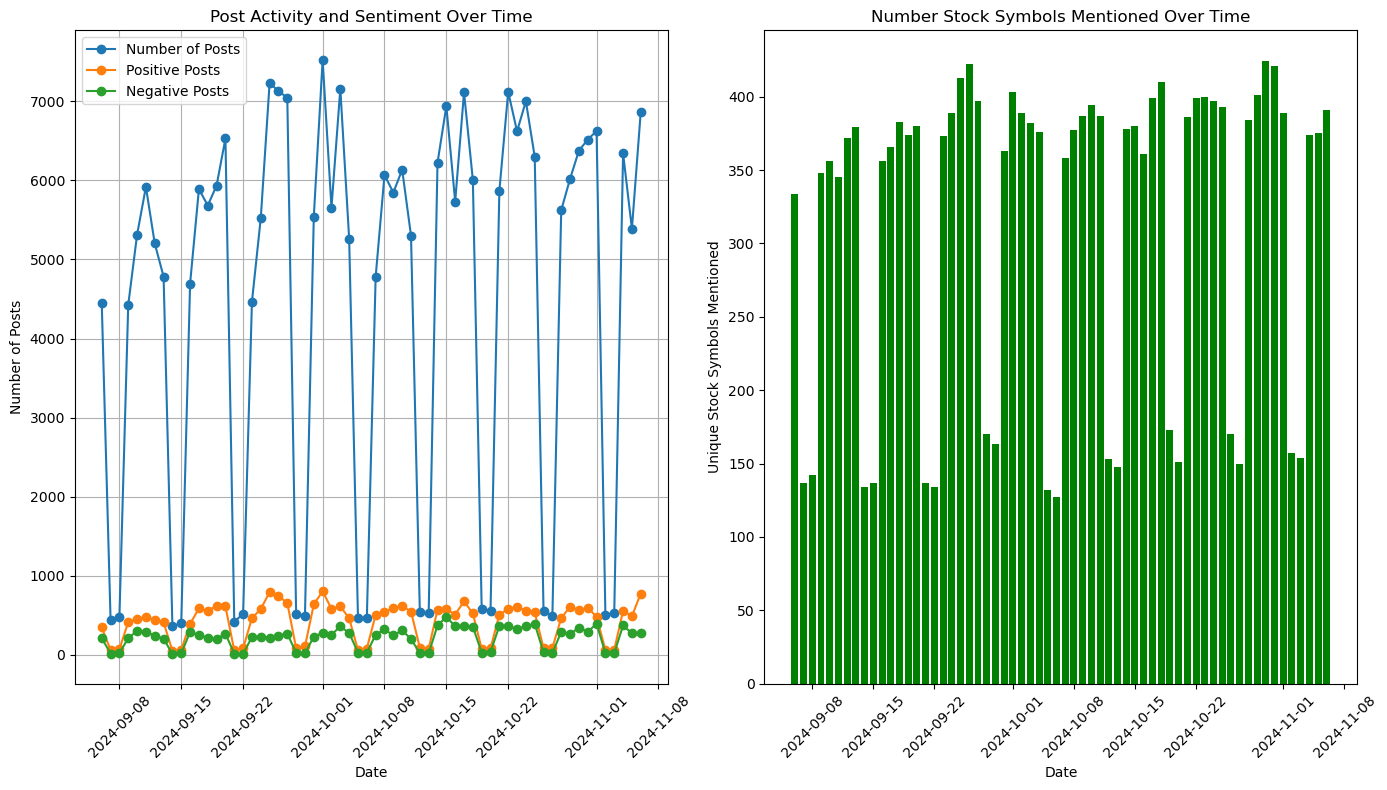

In [276]:
# Set the figure size
plt.figure(figsize=(14, 8))

# Subplot 1: Number of Posts, Positive Posts, Negative Posts over time
plt.subplot(1, 2, 1)
plt.plot(posts_analyze['date'], posts_analyze['number_of_posts'], label='Number of Posts', marker='o')
plt.plot(posts_analyze['date'], posts_analyze['number_of_positive_posts'], label='Positive Posts', marker='o')
plt.plot(posts_analyze['date'], posts_analyze['number_of_negative_posts'], label='Negative Posts', marker='o')
plt.title('Post Activity and Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)


# Subplot 2: Stock Symbols Mentioned over time
plt.subplot(1, 2, 2)
plt.bar(posts_analyze['date'], posts_analyze['stock_symbols_mentioned'], color='green')
plt.title('Number Stock Symbols Mentioned Over Time')
plt.xlabel('Date')
plt.ylabel('Unique Stock Symbols Mentioned')
plt.xticks(rotation=45)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [277]:
sentiment_analysis = posts_df.groupby('sentiment').agg(
    number_of_posts = ('postID', 'count'),
    average_posts_len = ('word_count', 'mean'),
    total_likes = ('totalLikes', 'sum'),
    total_replies = ('totalReplies', 'sum'),
    stock_symbols_mentioned = ('symbol', lambda x: x.nunique())
).reset_index()

sentiment_analysis

,sentiment,number_of_posts,average_posts_len,total_likes,total_replies,stock_symbols_mentioned
0,negative,13317,20.937974,13762,24789,426
1,neutral,233586,25.326004,231427,385882,1087
2,positive,26076,54.846257,43038,58713,554


In [278]:
user_activity = posts_df.groupby('userid').agg(
    userName = ('username', 'first'),
    number_of_posts = ('postID', 'count'),
    average_posts_len = ('word_count', 'mean'),
    total_likes = ('totalLikes', 'sum'),
    total_replies = ('totalReplies', 'sum'),
    stock_symbols_mentioned = ('symbol', lambda x: x.nunique())
).reset_index()




In [279]:
user_activity.sort_values(by = 'number_of_posts', ascending = False, inplace = True)
user_activity = user_activity.round(2)
user_activity.head(3)

,userid,userName,number_of_posts,average_posts_len,total_likes,total_replies,stock_symbols_mentioned
357,0406662e-2ee3-49fe-8ce1-317a1aec3dc8,gametaophoton,1168,24.01,328,1255,45
8109,5a1365a4-46fc-41d7-b021-45f7d02d639f,THÍCH CHƠI XÍCH ĐU,933,8.94,885,1067,71
88,00cafff2-e845-4022-bafe-5113a8e7924d,Helen Lan Anh,865,9.19,579,1292,23


In [280]:
symbol_mentions_over_time = posts_df.groupby(['date', 'symbol']).agg(
    number_of_mentions = ('symbol', 'count'),
    average_posts_len = ('word_count', 'mean'),
    total_likes = ('totalLikes', 'sum'),
    total_replies = ('totalReplies', 'sum')
).reset_index()

In [281]:
symbol_mentions_over_time.round(2).head(2)


,date,symbol,number_of_mentions,average_posts_len,total_likes,total_replies
0,2024-09-06,$APT,1,11.0,0,0
1,2024-09-06,$BTC,70,31.8,83,289


In [282]:
posts_df['hour'] = posts_df['time'].dt.hour  # Extract the hour from the date
activity_by_hour = posts_df.groupby('hour').agg(
    number_of_posts = ('postID', 'count'),
    average_posts_len = ('word_count', 'mean'),
    total_likes = ('totalLikes', 'sum'),
    total_replies = ('totalReplies', 'sum')
).reset_index()



In [283]:
activity_by_hour = activity_by_hour.round(2)
activity_by_hour.head(2)


,hour,number_of_posts,average_posts_len,total_likes,total_replies
0,0,760,64.92,1366,1942
1,1,466,49.85,722,1121


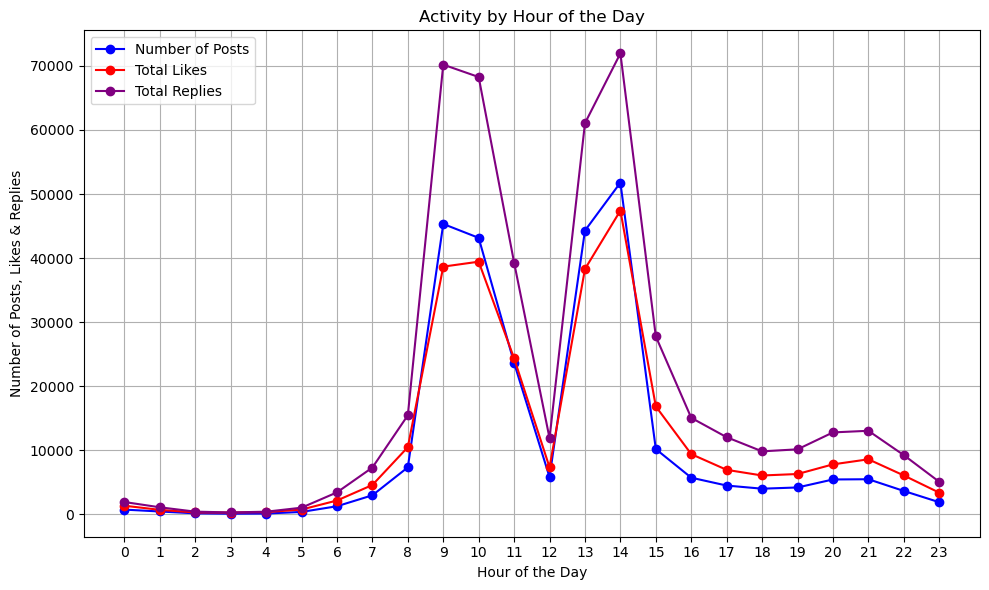

In [284]:
# Create a figure
plt.figure(figsize=(10, 6))

# Plot the three metrics (number_of_posts, total_likes, total_replies) on the primary y-axis
plt.plot(activity_by_hour['hour'], activity_by_hour['number_of_posts'], marker='o', label='Number of Posts', color='blue')
plt.plot(activity_by_hour['hour'], activity_by_hour['total_likes'], marker='o', label='Total Likes', color='red')
plt.plot(activity_by_hour['hour'], activity_by_hour['total_replies'], marker='o', label='Total Replies', color='purple')

# Add labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Posts, Likes & Replies')
plt.title('Activity by Hour of the Day')

# Customize ticks and grid
plt.xticks(range(24))
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()